### 01. 라이브러리 임포트

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

### 02. 데이터 불러오기 (xlsx)

In [2]:
df = pd.read_excel('wpdb.xlsx')
df.head()

,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


### 03. 학습에 사용될 데이터와 예측 데이터 설정
- 학습 데이터 X
- 예측 데이터 y
    - 0과 1의 값만 존재하며, 분류를 이용하여 예측 예정

In [3]:
X=df[df.columns[6:]]
X.head()

,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [4]:
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus'])
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,5,0,3,0,0,1,41,0
1,16,5,0,19,0,0,0,52,0
2,16,8,0,0,0,0,0,0,1
3,16,2,0,0,0,0,0,6,0
4,16,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,15,2,1,20,0,0,0,64,1
2493,16,9,0,0,0,0,0,0,1
2494,16,3,1,9,0,0,0,23,0
2495,17,6,0,0,0,0,0,0,1


### 04. 나이 데이터 0, 1, 2로 변환

In [5]:
X['StudentGrade'].replace({15: 0, 16: 1, 17:2}, inplace=True)

In [6]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,2,5,0,3,0,0,1,41,0
1,1,5,0,19,0,0,0,52,0
2,1,8,0,0,0,0,0,0,1
3,1,2,0,0,0,0,0,6,0
4,1,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64,1
2493,1,9,0,0,0,0,0,0,1
2494,1,3,1,9,0,0,0,23,0
2495,2,6,0,0,0,0,0,0,1


In [7]:
pd.DataFrame(X).describe()

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,1.080497,10.095715,0.236684,8.060473,0.010813,0.028835,2.785342,64.474169,0.567080
std,0.822076,10.497140,0.648321,9.690521,0.130807,0.447538,5.310735,80.639647,0.495579
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,31.000000,1.000000
75%,2.000000,14.000000,0.000000,13.000000,0.000000,0.000000,3.000000,95.000000,1.000000
max,2.000000,62.000000,19.000000,64.000000,2.000000,11.000000,54.000000,396.000000,1.000000


In [8]:
print(X.shape)
type(X)

(2497, 9)


pandas.core.frame.DataFrame

In [9]:
# 정답(레이블) 설정
y = X['target']
y # 0과 1로 구분, 1:재원 / 0:퇴원

0       0
1       0
2       1
3       0
4       1
       ..
2492    1
2493    1
2494    0
2495    1
2496    0
Name: target, Length: 2497, dtype: int64

In [10]:
print(y.shape)

(2497,)


In [11]:
X = X.drop(columns = ['target'])

In [12]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count
0,2,5,0,3,0,0,1,41
1,1,5,0,19,0,0,0,52
2,1,8,0,0,0,0,0,0
3,1,2,0,0,0,0,0,6
4,1,29,0,23,0,0,1,278
...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64
2493,1,9,0,0,0,0,0,0
2494,1,3,1,9,0,0,0,23
2495,2,6,0,0,0,0,0,0


### 05. 결측치 확인

In [13]:
X.isnull().sum()

StudentGrade          0
cs_count              0
withdraw_csl_count    0
remain_csl_count      0
supply_count          0
clinic_count          0
abs_count             0
pre_count             0
dtype: int64

### 06. 데이터 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

### 1) 학습 데이터의 정규화

In [15]:
scaler_minmax.fit(X)
X_scaled_minmax_train=scaler_minmax.transform(X)
pd.DataFrame(X_scaled_minmax_train).describe()

# 최소값(min)은 0으로, 최대값(max)은 1로 나타난 걸 확인할 수 있음

,0,1,2,3,4,5,6,7
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.540248,0.149110,0.012457,0.125945,0.005406,0.002621,0.051580,0.162814
std,0.411038,0.172084,0.034122,0.151414,0.065404,0.040685,0.098347,0.203635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016393,0.000000,0.015625,0.000000,0.000000,0.000000,0.010101
50%,0.500000,0.081967,0.000000,0.062500,0.000000,0.000000,0.000000,0.078283
75%,1.000000,0.213115,0.000000,0.203125,0.000000,0.000000,0.055556,0.239899
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
'''X_scaled_standard_train'''

'X_scaled_standard_train'

### 2) 검증 데이터의 정규화

In [17]:
'''scaler_standard.fit(X_val)
X_scaled_standard_train=scaler_standard.transform(X_val)
pd.DataFrame(X_scaled_standard_train).describe()'''

'scaler_standard.fit(X_val)\nX_scaled_standard_train=scaler_standard.transform(X_val)\npd.DataFrame(X_scaled_standard_train).describe()'

### 3) 테스트 데이터의 정규화

In [18]:
'''X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()'''

'X_scaled_minmax_test=scaler_minmax.transform(X_test)\npd.DataFrame(X_scaled_minmax_test).describe()'

### 07. 학습 데이터와 검증용 데이터 분리
- Train/Test set 분리
- Train/Validation/Test set 분리

In [19]:
# Train/Test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 1) 

# stratify : 훈련 데이터와 테스트 데이터를 구분할 때, 레이블의 범주비율에 맞게 하라는 것 (회귀에는 사용 X)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1997, 8), (500, 8), (1997,), (500,))

In [21]:
'''# Train/Validation/Test set 분리 (6:2:2)

X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'''

'# Train/Validation/Test set 분리 (6:2:2)\n\nX_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'

In [22]:
'''X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'''

'X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'

### 08. Random Forest 학습 및 예측

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# 객체 생성
rf = RandomForestClassifier()

# 학습
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rf.predict(X_test)

In [26]:
y_pred
#print(len(pred1))

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [27]:
# 분류된 클래스 가능성
proba1 = rf.predict_proba(X_test)
proba1

array([[0.912     , 0.088     ],
       [0.02      , 0.98      ],
       [0.01      , 0.99      ],
       [0.61      , 0.39      ],
       [0.88      , 0.12      ],
       [0.4       , 0.6       ],
       [0.96      , 0.04      ],
       [0.45      , 0.55      ],
       [0.87      , 0.13      ],
       [0.96      , 0.04      ],
       [0.03      , 0.97      ],
       [0.63      , 0.37      ],
       [0.01      , 0.99      ],
       [0.02      , 0.98      ],
       [0.08      , 0.92      ],
       [0.10484192, 0.89515808],
       [0.14      , 0.86      ],
       [0.35      , 0.65      ],
       [0.02      , 0.98      ],
       [0.01      , 0.99      ],
       [0.39      , 0.61      ],
       [0.01      , 0.99      ],
       [0.95      , 0.05      ],
       [0.96      , 0.04      ],
       [0.1       , 0.9       ],
       [0.        , 1.        ],
       [0.97      , 0.03      ],
       [0.96      , 0.04      ],
       [0.02      , 0.98      ],
       [0.72      , 0.28      ],
       [0.

In [28]:
print('Train_Accuracy: ', rf.score(X_train, y_train),'\n')

Train_Accuracy:  0.9734601902854282 



### 09. 테스트셋에 대한 모델 정확도 확인

In [29]:
import sklearn.metrics as mt

In [30]:
accuracy = mt.accuracy_score(y_test, y_pred)
print('Test_Accuracy: ', format(accuracy,'.2f'),'\n')

Test_Accuracy:  0.85 



### 10. 모델 학습 결과 평가 및 결과지표 확인(컨퓨전 매트릭스)

In [31]:
print('Train_Accuracy: ', rf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.9734601902854282 

Accuracy:  0.85 

Recall:  0.87 

Precision:  0.86 

F1_score:  0.87 

Confusion Matrix: 
 [[177  39]
 [ 37 247]]


In [49]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN) 수동 정확도 계산
(177+247) / matrix .sum()

0.848

### 10. K-Fold 교차검증(cross-validation)

In [33]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(rf, X, y, cv = 5)
scores

array([0.864     , 0.842     , 0.84368737, 0.85170341, 0.82765531])

In [34]:
pd.DataFrame(cross_validate(rf, X, y, cv =5))

,fit_time,score_time,test_score
0,0.289916,0.016212,0.856000
1,0.282392,0.015934,0.834000
2,0.252261,0.015534,0.835671
3,0.295451,0.015569,0.849699
4,0.281346,0.015622,0.825651


In [35]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.8458092184368737


### 11. 하이퍼 파라미터 튜닝
- criterion : 이론 파트에서 다룬 노드 분리기준입니다. 'gini'와 'entropy'를 사용합니다.
- splitter : 노드 분리 방법으로 'random', 'best'를 사용합니다.
- max_depth : 트리 모형의 최대 깊이를 의미하며 값이 커질수록 깊어져 과적합이 쉽게 일어납니다.
- min_samples_split : 중간노드에서 분리가 일어나기 위한 샘플의 수입니다. 
- min_samples_leaf : leaf 노드에서 필요한 최소한의 샘플 수이며 너무 적으면 과적합이 일어날 수 있습니다.
- max_features : 노드를 분리할 때 고려하는 속성의 수입니다. 'int', 'float', 'auto', 'sqrt', 'log2', None 값이 들어가며 각 다른 방식으로 계산해 속성의 수를 고려합니다.
- random_state : 다른 알고리즘에도 공통으로 들어가는 파라미터로 알고리즘은 실행마다 값이 변하기 때문에 값 변화를 보기 힘듭니다. 하지만 random_state를 고정하면 값 변화를 살펴보고 모델의 성능 개선에 대한 판단을 내릴 수 있습니다. 

$a^2 + a^3 = 3$

#### GridSearchCV
- sklearn 패키지에서 제공하는 것으로 튜닝하고 싶은 파라미터를 집어넣어 튜닝과 교차검증을 함께 진행할 수 있게 도와줌
- gridsearch는 확인하고 싶은 다양한 파라미터값을 넣어주면 그것들을 하나씩 확인하면서 스코어를 내고 가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

✅ 최적 파라미터 구하기

In [36]:
from sklearn.model_selection import GridSearchCV   
# GridSearchCV : 지정된 매개변수 그리드를 철저하게 검색하여 머신러닝 모델에 가장 적합한 매개변수를 찾는 하이퍼파라미터 튜닝 기술

params = {
    'max_depth': [None, 3, 5, 7, 9],  # 범위값을 지정
    'min_samples_split': [2, 3, 5, 7, 20],
    #'bootstrap' : [True, False],
    'n_estimators' : [10, 30, 50, 70, 100],
    #'criterion': ['gini', 'entropy']
          }
          
# 객체 생성
rf3 = RandomForestClassifier(random_state=10, n_jobs=-1)

# 최적의 하이퍼 파라미터를 찾는 객체 생성
grid_df = GridSearchCV(rf3, params, cv=5)  # cv: 데이터 교차검증 수
                                           # rf3 : 하이퍼파라미터를 조정하려는 estimator(이 경우 Random Forest 분류기 인스턴스)
# 학습
grid_df.fit(X_train, y_train)

# best_params_: 최적의 성능을 만들 하이퍼 파라미터를 알려줌(params로 설정해놓은 범위 내에서)
grid_df.best_params_ 

{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 10}

In [37]:
result = pd.DataFrame(grid_df.cv_results_['params'])
result['mean_test_score'] = grid_df.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,n_estimators,mean_test_score
110,9.0,5,10,0.847272
108,9.0,3,70,0.846273
12,NaN,5,50,0.845771
117,9.0,7,50,0.845769
9,NaN,3,100,0.845267
...,...,...,...,...
25,3.0,2,10,0.765627
40,3.0,7,10,0.765125
45,3.0,20,10,0.765125
30,3.0,3,10,0.764123


✅ 최적 파라미터 적용했을 때의 정확도

In [38]:
# 최적의 하이퍼 파라미터 적용
rf3 = RandomForestClassifier(min_samples_split=5, max_depth=9, n_estimators=10, random_state=10, criterion='entropy')
rf3.fit(X_train, y_train)

y_pred3 = rf3.predict(X_test)

accuracy3 = mt.accuracy_score(y_test, y_pred3)
print('Accuracy: ', format(accuracy3,'.2f'),'\n')

Accuracy:  0.85 



In [39]:
proba3 = rf3.predict_proba(X_test)
#accuracy = mt.accuracy_score(y_test, y_pred)
#roc_auc_score(y_test, proba3)
proba3 

array([[0.80988954, 0.19011046],
       [0.04166667, 0.95833333],
       [0.        , 1.        ],
       [0.7475364 , 0.2524636 ],
       [0.89682051, 0.10317949],
       [0.19297894, 0.80702106],
       [0.95189304, 0.04810696],
       [0.62731765, 0.37268235],
       [0.85659942, 0.14340058],
       [0.92581254, 0.07418746],
       [0.04421676, 0.95578324],
       [0.78903559, 0.21096441],
       [0.03032787, 0.96967213],
       [0.14763619, 0.85236381],
       [0.04444444, 0.95555556],
       [0.08908   , 0.91092   ],
       [0.36118323, 0.63881677],
       [0.51460894, 0.48539106],
       [0.00119048, 0.99880952],
       [0.1586168 , 0.8413832 ],
       [0.53285714, 0.46714286],
       [0.02249102, 0.97750898],
       [0.79139598, 0.20860402],
       [0.82318431, 0.17681569],
       [0.11177672, 0.88822328],
       [0.00740093, 0.99259907],
       [0.92899762, 0.07100238],
       [0.84699248, 0.15300752],
       [0.        , 1.        ],
       [0.7825    , 0.2175    ],
       [0.

In [40]:
'''from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
param = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

grid_dt2 = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = param, cv = 5,
                      n_jobs = -1 #모든 cpu를 사용)
                      )

grid_dt2.fit(X_train, y_train)

result = pd.DataFrame(grid_dt2.cv_results_['params'])
result['mean_test_score'] = grid_dt2.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)'''

"from sklearn.model_selection import GridSearchCV\n\n# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의\n\ndt_clf = DecisionTreeClassifier(random_state=33)\nparam = {'criterion': ['gini', 'entropy'],\n              'max_depth': [3, 5, 7, 9],\n              'min_samples_split': [x for x in range(3, 15,2)],\n              'min_samples_leaf': [x for x in range(1, 15,2)],\n              'max_features': ['auto', 'sqrt', 'log2'],\n              'class_weight': ['balanced', None],\n              'splitter': ['best', 'random']}\n\ngrid_dt2 = GridSearchCV(dt_clf, # estimator 객체,\n                      param_grid = param, cv = 5,\n                      n_jobs = -1 #모든 cpu를 사용)\n                      )\n\ngrid_dt2.fit(X_train, y_train)\n\nresult = pd.DataFrame(grid_dt2.cv_results_['params'])\nresult['mean_test_score'] = grid_dt2.cv_results_['mean_test_score']\nresult.sort_values(by='mean_test_score', ascending=False)"

#### 파라미터 유형
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

### 12. 시각화

✅ 피쳐중요도를 데이터프레임으로 만들기

In [41]:
feat_imp = pd.DataFrame({
    'features': X_train.columns,
    'importances':rf3.feature_importances_
})

feat_imp

,features,importances
0,StudentGrade,0.106210
1,cs_count,0.249378
2,withdraw_csl_count,0.091297
3,remain_csl_count,0.105443
4,supply_count,0.002995
5,clinic_count,0.001777
6,abs_count,0.142761
7,pre_count,0.300139


In [42]:
sum(feat_imp['importances'])

1.0

✅ 가장 영향력 있는 feature 3개를 뽑아보기

In [43]:
top3 = feat_imp.sort_values('importances', ascending=False).head(3)
top3

,features,importances
7,pre_count,0.300139
1,cs_count,0.249378
6,abs_count,0.142761


<Axes: xlabel='importances', ylabel='features'>

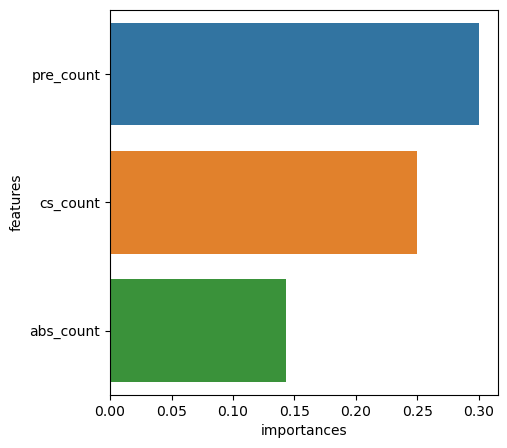

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.barplot(x='importances', y='features', data=top3)

✅ 가장 높은 점수가 나온 트리를 찾아보기

In [45]:
import numpy as np 
idx=0
result=[]
# estimators_ 분류기 리스트 (10개)
for f in rf3.estimators_:
    result.append(f.score(X_test,y_test))
    idx+=1 
print(result)    
print(max(result)) 
print(np.argmax(result)) #최대값의 인덱스
# 6개의 트리 중 가장 정확도가 높은 트리 선택

[0.786, 0.79, 0.764, 0.804, 0.792, 0.79, 0.794, 0.794, 0.792, 0.786]
0.804
3


C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted w

✅ 가장 정확도가 높은 트리 시각화

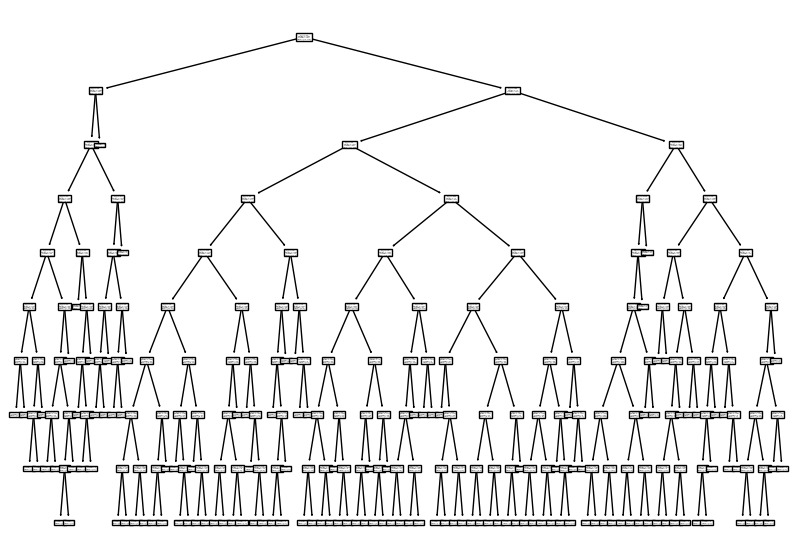

In [46]:
import matplotlib.pyplot as plt 
from sklearn import tree 

plt.figure(figsize=(10,7))
tree.plot_tree(rf3.estimators_[3]) #가장 정확도가 높은 트리 
plt.show()

In [47]:
x_list = list(X.columns)
print(x_list)

y_list = list(y.drop_duplicates(inplace=False))
print(y_list)
print(type(y_list))

['StudentGrade', 'cs_count', 'withdraw_csl_count', 'remain_csl_count', 'supply_count', 'clinic_count', 'abs_count', 'pre_count']
[0, 1]
<class 'list'>


✅ graphviz 시각화

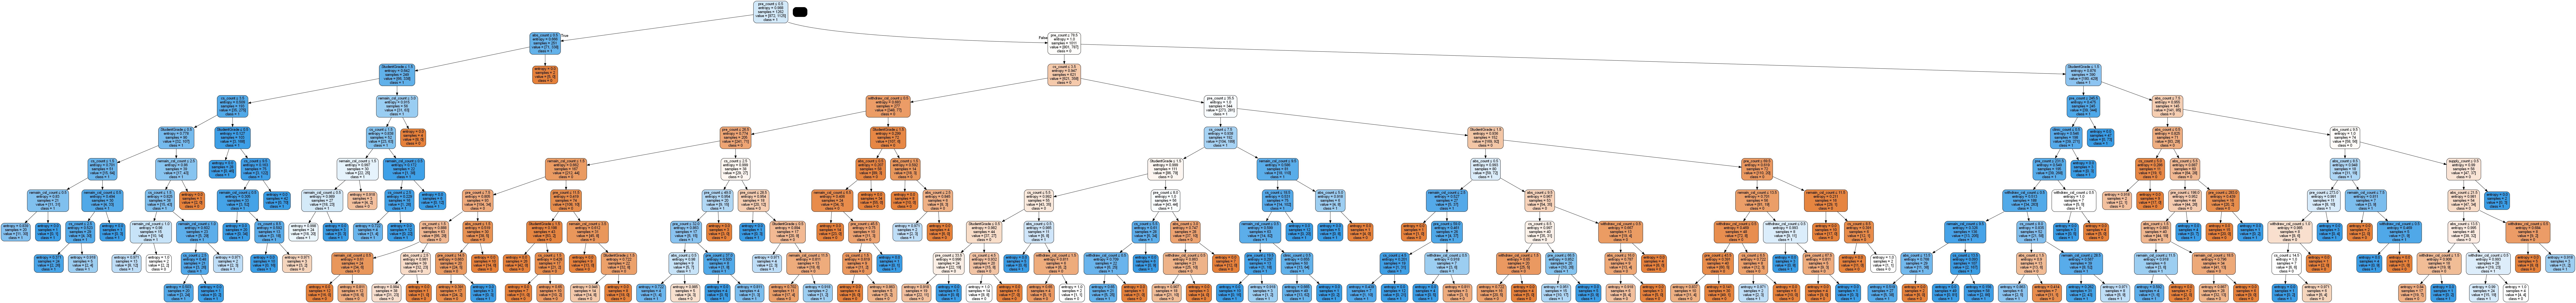

In [48]:
from sklearn.tree import export_graphviz
import pydotplus 
import graphviz
from IPython.display import Image 

dot_data=export_graphviz(rf3.estimators_[3], out_file=None, feature_names=x_list, class_names=[str(i) for i in y_list], filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())